In [1]:
using Pkg

Pkg.add("DataFrames", "CSV", "Plots", "GLM", "Statistics", "StatsPlots", "Distributions", "StatsBase", "StatsModels", MLBase")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [2]:
using DataFrames, CSV, Plots, GLM, Statistics, StatsPlots, Distributions, StatsBase, StatsModels, MLBase

In [3]:
df = CSV.read("airline.csv", DataFrame);

In [4]:
names(df)

3-element Vector{String}:
 "year"
 "month"
 "miles"

In [5]:
first(df, 4)

,year,month,miles
,Int64,Int64,Int64?
1,1963,1,6827
2,1963,2,6178
3,1963,3,7084
4,1963,4,8162


In [6]:
last(df,4)

,year,month,miles
,Int64,Int64,Int64?
1,1978,9,missing
2,1978,10,missing
3,1978,11,missing
4,1978,12,missing


# summary stat

In [7]:
describe(df.miles)

Summary Stats:
Length:         192
Missing Count:  96
Mean:           10385.739583
Minimum:        6178.000000
1st Quartile:   8600.250000
Median:         10401.000000
3rd Quartile:   11768.000000
Maximum:        16234.000000
Type:           Union{Missing, Int64}


# summary stat before 1967

In [8]:
df1 = df[(df[!,:year].<=1966),:]

describe(df1.miles)

Summary Stats:
Length:         48
Missing Count:  0
Mean:           9174.583333
Minimum:        6178.000000
1st Quartile:   7826.500000
Median:         9089.000000
3rd Quartile:   10509.000000
Maximum:        12417.000000
Type:           Union{Missing, Int64}


# generate trend

In [9]:
df[:,:trend] = 1:nrow(df);

first(df,5)

,year,month,miles,trend
,Int64,Int64,Int64?,Int64
1,1963,1,6827,1
2,1963,2,6178,2
3,1963,3,7084,3
4,1963,4,8162,4
5,1963,5,8462,5


# regression with trend

In [10]:
fm = @formula(miles ~ 1 + trend)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

miles ~ 1 + trend

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  7747.17     330.542    23.44    <1e-40  7090.88    8403.47
trend          54.4034     5.91749   9.19    <1e-14    42.6541    66.1527
─────────────────────────────────────────────────────────────────────────

In [11]:
df[:,:yhat] = predict(OLS_model, df);
df[:,:ehat] = df[:,:miles] - df[:,:yhat];

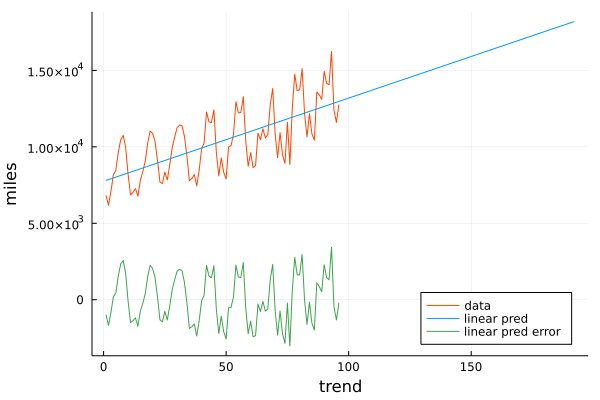

In [12]:
plot(xlabel="trend", ylabel="miles", legend=:bottomright)
plot!(df.trend, df.miles, color="orangered", label="data")
plot!(df.trend, df.yhat, color=1, label="linear pred")
plot!(df.trend, df.ehat, color=3, label="linear pred error")

# summary stat for error

In [13]:
describe(df.ehat)

Summary Stats:
Length:         192
Missing Count:  96
Mean:           -0.000000
Minimum:        -3029.833401
1st Quartile:   -1342.750883
Median:         -199.395874
3rd Quartile:   1449.895277
Maximum:        3427.308602
Type:           Union{Missing, Float64}


# summary stat for error between June and Sept

In [14]:
df2 = df[(df[!,:month].>=6) .& (df[!,:month].<=9),:];

describe(df2.ehat)

Summary Stats:
Length:         64
Missing Count:  32
Mean:           1786.763255
Minimum:        -749.799286
1st Quartile:   1451.454979
Median:         1799.959352
3rd Quartile:   2271.160949
Maximum:        3427.308602
Type:           Union{Missing, Float64}


# generate dummy

In [15]:
ux = unique(df.month);

dummy = select(df, :month .=> [ByRow(v -> x in v) for x in ux] .=> Symbol.(ux))

colnames = ["m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10", "m11", "m12"];
rename!(dummy, Symbol.(colnames))

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
df3 = hcat(df, dummy);

first(df3, 4)

,year,month,miles,trend,yhat,ehat,m1,m2,m3,m4,m5,m6
,Int64,Int64,Int64?,Int64,Float64?,Float64?,Bool,Bool,Bool,Bool,Bool,Bool
1,1963,1,6827,1,7801.58,-974.578,1,0,0,0,0,0
2,1963,2,6178,2,7855.98,-1677.98,0,1,0,0,0,0
3,1963,3,7084,3,7910.38,-826.384,0,0,1,0,0,0
4,1963,4,8162,4,7964.79,197.212,0,0,0,1,0,0


In [17]:
names(df3)

18-element Vector{String}:
 "year"
 "month"
 "miles"
 "trend"
 "yhat"
 "ehat"
 "m1"
 "m2"
 "m3"
 "m4"
 "m5"
 "m6"
 "m7"
 "m8"
 "m9"
 "m10"
 "m11"
 "m12"

# dummy regression with trend

In [19]:
fm = @formula(miles ~ 1 + trend + m2 + m3 + m4 + m5 + m6 + m7 + m8 + m9 + m10 + m11 + m12)
OLS_model = lm(fm, df3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

miles ~ 1 + trend + m2 + m3 + m4 + m5 + m6 + m7 + m8 + m9 + m10 + m11 + m12

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  6214.7      280.408    22.16    <1e-35   5656.97    6772.42
trend          52.9606     2.68324  19.74    <1e-32     47.6237    58.2974
m2           -513.461    361.442    -1.42    0.1592  -1232.35     205.432
m3           1189.58     361.472     3.29    0.0015    470.627   1908.53
m4           1240.62     361.521     3.43    0.0009    521.567   1959.67
m5           2051.28     361.591     5.67    <1e-06   1332.09    2770.47
m6           3325.32     361.681     9.19    <1e-13   2605.95    

# compute predictions and plot

In [20]:
df3[:,:yhat] = predict(OLS_model, df3);
df3[:,:ehat] = df3[:,:miles] - df3[:,:yhat];

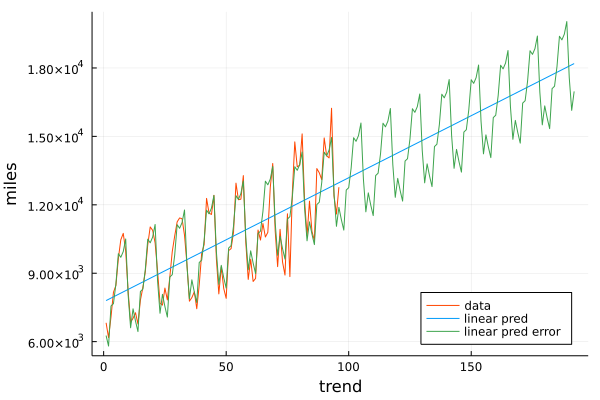

In [21]:
plot(xlabel="trend", ylabel="miles", legend=:bottomright)
plot!(df.trend, df.miles, color="orangered", label="data")
plot!(df.trend, df.yhat, color=1, label="linear pred")
plot!(df3.trend, df3.yhat, color=3, label="linear pred with dummy")